In [1]:
import numpy as np
import pandas as pd
import pygad

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from LogisticRegression import LogisticRegression
from utils import plot_2d_boundary, get_line_eq

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
df = pd.read_csv("./Datasets/Data2-circles-2D.csv")
df.head()


,Feature 0,Feature 1,target
0,-0.490097,0.037513,1
1,0.219836,-0.399650,1
2,-0.854565,-0.349471,0
3,-0.956407,-0.256714,0
4,-0.878756,-0.630345,0


In [3]:
feats = df.drop('target', axis=1).values
target = df.drop(['Feature 0', 'Feature 1'], axis=1).values.reshape(-1)


<AxesSubplot:>

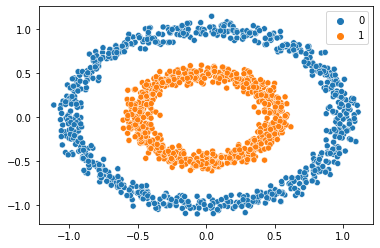

In [4]:
sns.scatterplot(x=feats[:, 0], y=feats[:, 1], hue=target)

In [5]:
X, y = feats, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [6]:
model = LogisticRegression(learning_rate=0.1, lambda_=0.4, feat_map_deg=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       148
        True       1.00      1.00      1.00       152

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



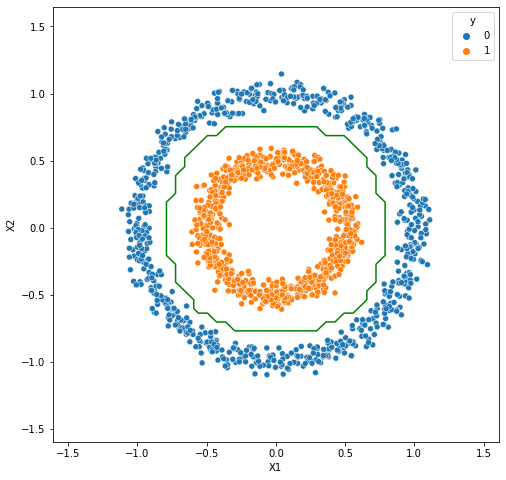

y = 2.857358634538024 * x1 + -0.010610805111629531 * x2 + 0.018579333296937298 * x3 + -2.9369360786860517 * x4 + -0.02955886422257502 * x5 + -3.0277404217138826 * x6 + 0.011109418864030196 * x7 + 0.031037302225428883 * x8 + 0.002614979398491043 * x9 + -0.03555492743519601 * x10 + -2.865420942799272 * x11 + -0.03529100996070995 * x12 + -1.1837133451230137 * x13 + 0.017169661066160583 * x14 + -2.9206884205412065 * x15


In [7]:
plot_2d_boundary(model, X, y)
print(get_line_eq(model))

Genetic Algorithm:

In [8]:
def fitness_func(ga_isntance, solution, solution_idx):
    model = LogisticRegression(learning_rate=0.1, lambda_=0.4, feat_map_deg=4)
    
    # Set the initial weights 
    model.weights = solution 

    y_pred = model.predict(X_test)
    fitness = accuracy_score(y_test, y_pred)
    return fitness

In [9]:
num_generations = 50
num_parents_mating = 10
fitness_func = fitness_func
sol_per_pop = 50
num_genes = len(model.weights) # Number of features or weights
gene_type = np.float32
parent_selection_type = "rank"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_type=gene_type,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()


In [10]:
best_solution = ga_instance.best_solution()
best_weights = best_solution[0]

final_model = model
# Use the weights that Genetic Algorithm found as our model weights
final_model.weights = best_weights
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       148
        True       1.00      1.00      1.00       152

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



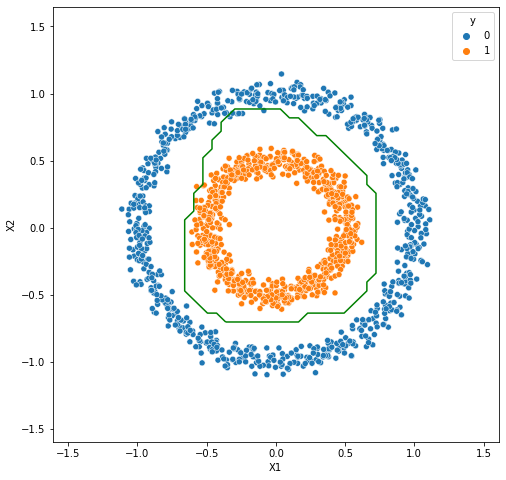

y = 1.4448145627975464 * x1 + -0.9723630547523499 * x2 + -0.13586054742336273 * x3 + 0.3852919042110443 * x4 + 1.3534438610076904 * x5 + -0.7808630466461182 * x6 + 3.409207582473755 * x7 + -2.867992401123047 * x8 + 0.2148701250553131 * x9 + 1.6044949293136597 * x10 + -7.755982875823975 * x11 + 1.6171735525131226 * x12 + -4.392946243286133 * x13 + -4.409098148345947 * x14 + -3.1726796627044678 * x15


In [11]:
plot_2d_boundary(model, X, y)
print(get_line_eq(model))

### Dataset 3

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       142
        True       0.97      0.95      0.96       158

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



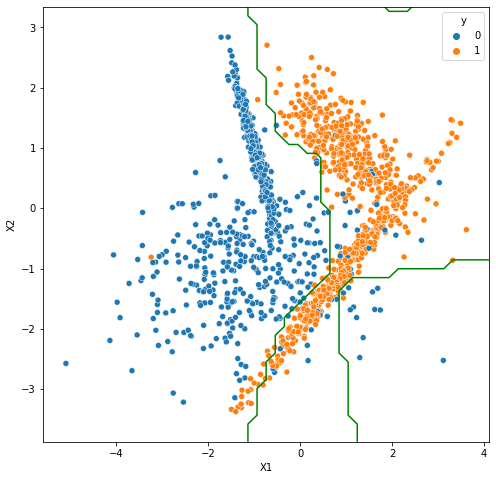

y = -4.419393062591553 * x1 + 4.221954345703125 * x2 + 1.6806694269180298 * x3 + 3.5585384368896484 * x4 + -2.5117523670196533 * x5 + 2.1245226860046387 * x6 + 6.259487152099609 * x7 + 0.6228724122047424 * x8 + 0.08319459855556488 * x9 + 0.099281907081604 * x10 + -0.7205193042755127 * x11 + 4.121938228607178 * x12 + -5.5851287841796875 * x13 + -0.10611239820718765 * x14 + 0.47201865911483765 * x15


In [12]:
df = pd.read_csv("./Datasets/Data3-classification-2D.csv")
feats = df.drop('target', axis=1).values
target = df.drop(['Feature 0', 'Feature 1'], axis=1).values.reshape(-1)

X, y = feats, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = LogisticRegression(learning_rate=0.1, lambda_=0.4, feat_map_deg=4)
model.fit(X_train, y_train)

def fitness_func(ga_isntance, solution, solution_idx):
    model = LogisticRegression(learning_rate=0.1, lambda_=0.4, feat_map_deg=4)
    model.weights = solution
    y_pred = model.predict(X_test)
    fitness = accuracy_score(y_test, y_pred)
    return fitness

num_generations = 50
num_parents_mating = 10
fitness_func = fitness_func
sol_per_pop = 50
num_genes = len(model.weights)
gene_type = np.float32
parent_selection_type = "rank"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_func,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    gene_type=gene_type,
                    parent_selection_type=parent_selection_type,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes)

ga_instance.run()

best_solution = ga_instance.best_solution()
best_weights = best_solution[0]

final_model = model
final_model.weights = best_weights
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
plot_2d_boundary(model, X, y)
print(get_line_eq(model))

### Dataset 4

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       157
        True       1.00      0.99      1.00       143

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



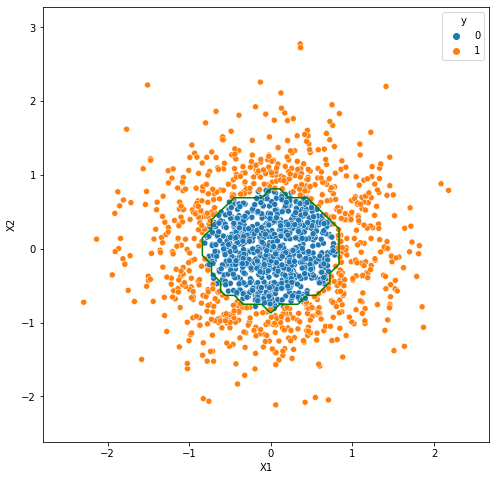

y = -2.0957772731781006 * x1 + -0.2290654480457306 * x2 + -0.0706113800406456 * x3 + 3.0895161628723145 * x4 + -0.06964980065822601 * x5 + 3.406931161880493 * x6 + 0.24051445722579956 * x7 + -0.0892033576965332 * x8 + 0.30496013164520264 * x9 + 0.4431021213531494 * x10


In [15]:
df = pd.read_csv("./Datasets/Data4-gaussian-2D.csv")
feats = df.drop('target', axis=1).values
target = df.drop(['Feature 0', 'Feature 1'], axis=1).values.reshape(-1)

X, y = feats, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = LogisticRegression(learning_rate=0.1, lambda_=0.4, feat_map_deg=3)
model.fit(X_train, y_train)

def fitness_func(ga_isntance, solution, solution_idx):
    model = LogisticRegression(learning_rate=0.1, lambda_=0.4, feat_map_deg=3)
    model.weights = solution
    y_pred = model.predict(X_test)
    fitness = accuracy_score(y_test, y_pred)
    return fitness

num_generations = 50
num_parents_mating = 10
fitness_func = fitness_func
sol_per_pop = 50
num_genes = len(model.weights)
gene_type = np.float32
parent_selection_type = "rank"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_func,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    gene_type=gene_type,
                    parent_selection_type=parent_selection_type,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes)

ga_instance.run()

best_solution = ga_instance.best_solution()
best_weights = best_solution[0]

final_model = model
final_model.weights = best_weights
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
plot_2d_boundary(model, X, y)
print(get_line_eq(model))

### Dataset 5

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       148
        True       1.00      1.00      1.00       152

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



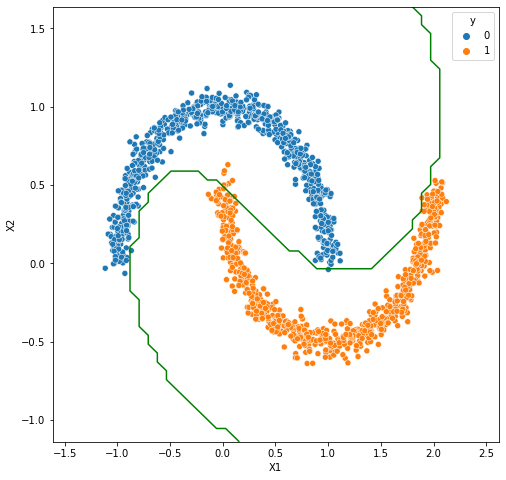

y = 1.7309341430664062 * x1 + -1.2502402067184448 * x2 + -2.546454668045044 * x3 + -2.3701562881469727 * x4 + -2.5631773471832275 * x5 + -2.557589530944824 * x6 + 1.6705821752548218 * x7 + 0.33267512917518616 * x8 + 1.9289708137512207 * x9 + 1.2980306148529053 * x10


In [14]:
df = pd.read_csv("./Datasets/Data5-moon-2D.csv")
feats = df.drop('target', axis=1).values
target = df.drop(['Feature 0', 'Feature 1'], axis=1).values.reshape(-1)

X, y = feats, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = LogisticRegression(learning_rate=0.1, lambda_=0.4, feat_map_deg=3)
model.fit(X_train, y_train)

def fitness_func(ga_isntance, solution, solution_idx):
    model = LogisticRegression(learning_rate=0.1, lambda_=0.4, feat_map_deg=3)
    model.weights = solution
    y_pred = model.predict(X_test)
    fitness = accuracy_score(y_test, y_pred)
    return fitness

num_generations = 50
num_parents_mating = 10
fitness_func = fitness_func
sol_per_pop = 50
num_genes = len(model.weights)
gene_type = np.float32
parent_selection_type = "rank"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                    num_parents_mating=num_parents_mating,
                    fitness_func=fitness_func,
                    sol_per_pop=sol_per_pop,
                    num_genes=num_genes,
                    gene_type=gene_type,
                    parent_selection_type=parent_selection_type,
                    crossover_type=crossover_type,
                    mutation_type=mutation_type,
                    mutation_percent_genes=mutation_percent_genes)

ga_instance.run()

best_solution = ga_instance.best_solution()
best_weights = best_solution[0]

final_model = model
final_model.weights = best_weights
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
plot_2d_boundary(model, X, y)
print(get_line_eq(model))